<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula7c_MLP_reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data.shape, test_data.shape

2110848/2110848 [==============================] - 0s 0us/step


((8982,), (2246,))

In [130]:
train_data[0:1]

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])],
      dtype=object)

In [135]:
len(train_data[0]),len(train_data[1])

(87, 56)

In [132]:
train_labels[0:10]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16])

In [133]:
def decode_words(word_index, sentence):
  reverse_word_index = dict(
      [(value, key) for (key, value) in word_index.items()]
  )
  return " ".join(
      [reverse_word_index.get(i-3, "?") for i in sentence]
  )
decode_words(reuters.get_word_index(), train_data[0])

550378/550378 [==============================] - 0s 0us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [137]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train.shape, x_test.shape, x_train[:3, :32]

((8982, 10000),
 (2246, 10000),
 array([[0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
         1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.],
        [0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
         1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
         0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.]]))

In [141]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000)
x_train = tokenizer.sequences_to_matrix(train_data)
x_test = tokenizer.sequences_to_matrix(test_data)
x_train.shape, x_test.shape, x_train[:3, :32]

((8982, 10000),
 (2246, 10000),
 array([[0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
         1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.],
        [0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
         1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
         0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.]]))

In [142]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
y_train.shape, y_test.shape

((8982, 46), (2246, 46))

In [144]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax'),
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [145]:
n_val = 1000
x_val = x_train[:n_val]
partial_x_train = x_train[n_val:]
y_val = y_train[:n_val]
partial_y_train = y_train[n_val:]

In [146]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 69ms/step - loss: 2.7645 - accuracy: 0.4391 - val_loss: 1.8741 - val_accuracy: 0.6050
Epoch 2/20
16/16 [==============================] - 1s 66ms/step - loss: 1.5928 - accuracy: 0.6745 - val_loss: 1.4224 - val_accuracy: 0.6880
Epoch 3/20
16/16 [==============================] - 1s 78ms/step - loss: 1.2255 - accuracy: 0.7398 - val_loss: 1.2286 - val_accuracy: 0.7330
Epoch 4/20
16/16 [==============================] - 1s 65ms/step - loss: 1.0007 - accuracy: 0.7904 - val_loss: 1.1031 - val_accuracy: 0.7650
Epoch 5/20
16/16 [==============================] - 1s 45ms/step - loss: 0.8313 - accuracy: 0.8231 - val_loss: 1.0299 - val_accuracy: 0.7830
Epoch 6/20
16/16 [==============================] - 1s 45ms/step - loss: 0.6911 - accuracy: 0.8524 - val_loss: 0.9677 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 0.5787 - accuracy: 0.8760 - val_loss: 0.9269 - val_accuracy: 0.8110
Epoch 8/20
16

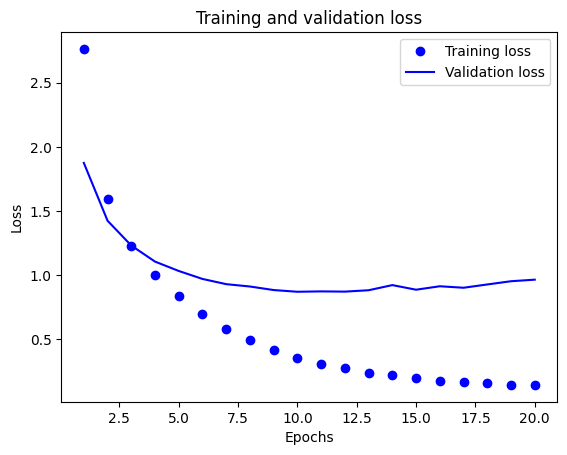

In [148]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

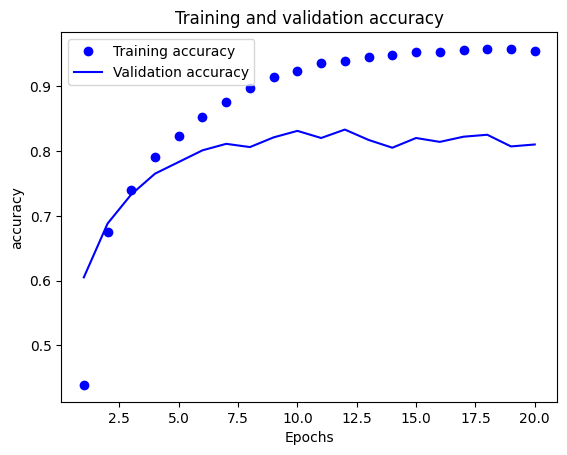

In [149]:
import matplotlib.pyplot as plt
history_dict = history.history
accuracy_values = history_dict["accuracy"]
val_accuracy_values = history_dict["val_accuracy"]
epochs = range(1, len(accuracy_values)+1)
plt.plot(epochs, accuracy_values, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy_values, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [150]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax'),
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,
                    epochs=10, batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/10
16/16 [==============================] - 2s 81ms/step - loss: 2.6842 - accuracy: 0.4687 - val_loss: 1.8503 - val_accuracy: 0.5920
Epoch 2/10
16/16 [==============================] - 1s 52ms/step - loss: 1.5592 - accuracy: 0.6614 - val_loss: 1.3846 - val_accuracy: 0.7020
Epoch 3/10
16/16 [==============================] - 1s 55ms/step - loss: 1.1987 - accuracy: 0.7420 - val_loss: 1.1977 - val_accuracy: 0.7290
Epoch 4/10
16/16 [==============================] - 1s 57ms/step - loss: 0.9824 - accuracy: 0.7849 - val_loss: 1.0885 - val_accuracy: 0.7550
Epoch 5/10
16/16 [==============================] - 1s 80ms/step - loss: 0.8210 - accuracy: 0.8193 - val_loss: 1.0212 - val_accuracy: 0.7780
Epoch 6/10
16/16 [==============================] - 1s 69ms/step - loss: 0.6956 - accuracy: 0.8524 - val_loss: 0.9625 - val_accuracy: 0.7910
Epoch 7/10
16/16 [==============================] - 1s 45ms/step - loss: 0.5839 - accuracy: 0.8756 - val_loss: 0.9273 - val_accuracy: 0.8030
Epoch 8/10
16

In [151]:
ypred = model.predict(x_test)
ypred

71/71 [==============================] - 0s 3ms/step


array([[2.7328285e-06, 2.2464987e-05, 7.7290806e-06, ..., 2.2384340e-05,
        3.1649499e-06, 3.3102597e-06],
       [2.9831147e-04, 1.2342772e-01, 3.6532976e-02, ..., 7.6120981e-05,
        8.4339081e-06, 1.0230936e-04],
       [2.9158683e-03, 4.6383256e-01, 1.3335539e-02, ..., 4.3504606e-03,
        9.1303384e-04, 3.2695706e-03],
       ...,
       [1.7814105e-05, 1.8471498e-04, 1.3877233e-04, ..., 9.8597739e-05,
        2.2036857e-05, 5.2758405e-05],
       [7.9053285e-04, 2.0758457e-02, 1.1508860e-02, ..., 9.2102727e-04,
        7.7455380e-04, 1.1164036e-03],
       [1.2195004e-03, 5.2947456e-01, 5.9243735e-02, ..., 3.8070683e-04,
        3.3710134e-04, 3.4363309e-04]], dtype=float32)

In [152]:
ypred[0]

array([2.73282853e-06, 2.24649866e-05, 7.72908061e-06, 9.65040863e-01,
       3.06799747e-02, 5.18589331e-06, 1.78519876e-05, 3.61920115e-06,
       4.19228163e-04, 3.04336004e-06, 4.54040492e-06, 2.04138065e-04,
       1.11348563e-05, 2.25021686e-05, 1.77813615e-06, 4.04338534e-05,
       7.87698198e-04, 3.91495632e-05, 6.00645180e-05, 3.51795810e-04,
       9.18309030e-04, 7.31004984e-05, 2.97051974e-06, 2.57418196e-05,
       1.54977297e-05, 3.52158131e-05, 1.05249160e-06, 8.18113494e-06,
       1.71427862e-04, 1.72374839e-05, 2.82186170e-06, 1.05547893e-04,
       7.53377099e-05, 3.36087105e-05, 1.99101851e-05, 3.51969584e-06,
       7.52921114e-05, 1.49248435e-05, 1.11285499e-05, 5.88321127e-04,
       4.69397764e-06, 3.43472930e-05, 7.16226077e-06, 2.23843399e-05,
       3.16494993e-06, 3.31025967e-06], dtype=float32)

In [153]:
np.argmax(ypred[0])

3

In [154]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.9721 - accuracy: 0.7801


In [155]:
results

[0.9721053838729858, 0.780053436756134]

In [156]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax'),
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 110ms/step - loss: 2.6403 - accuracy: 0.5170 - val_loss: 1.9041 - val_accuracy: 0.6300
Epoch 2/20
16/16 [==============================] - 1s 47ms/step - loss: 1.5770 - accuracy: 0.6907 - val_loss: 1.4254 - val_accuracy: 0.7010
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.1817 - accuracy: 0.7601 - val_loss: 1.1995 - val_accuracy: 0.7500
Epoch 4/20
16/16 [==============================] - 1s 46ms/step - loss: 0.9500 - accuracy: 0.8059 - val_loss: 1.0648 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 0.7894 - accuracy: 0.8389 - val_loss: 0.9806 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 1s 45ms/step - loss: 0.6674 - accuracy: 0.8663 - val_loss: 0.9179 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 1s 47ms/step - loss: 0.5709 - accuracy: 0.8854 - val_loss: 0.8772 - val_accuracy: 0.8230
Epoch 8/20
1

In [157]:
model = keras.Sequential([
    layers.Dense(100, activation='relu'),
    layers.Dense(46, activation='softmax'),
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 75ms/step - loss: 2.5384 - accuracy: 0.5581 - val_loss: 1.7411 - val_accuracy: 0.6610
Epoch 2/20
16/16 [==============================] - 1s 65ms/step - loss: 1.4296 - accuracy: 0.7229 - val_loss: 1.2879 - val_accuracy: 0.7330
Epoch 3/20
16/16 [==============================] - 2s 98ms/step - loss: 1.0500 - accuracy: 0.7823 - val_loss: 1.0909 - val_accuracy: 0.7750
Epoch 4/20
16/16 [==============================] - 2s 98ms/step - loss: 0.8300 - accuracy: 0.8276 - val_loss: 0.9828 - val_accuracy: 0.7960
Epoch 5/20
16/16 [==============================] - 1s 63ms/step - loss: 0.6717 - accuracy: 0.8671 - val_loss: 0.9105 - val_accuracy: 0.8040
Epoch 6/20
16/16 [==============================] - 1s 63ms/step - loss: 0.5560 - accuracy: 0.8913 - val_loss: 0.8656 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 1s 62ms/step - loss: 0.4664 - accuracy: 0.9084 - val_loss: 0.8276 - val_accuracy: 0.8210
Epoch 8/20
16

In [158]:
model = keras.Sequential([
    layers.Dense(100, activation='relu'),
    layers.Dense(46, activation='softmax'),
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,
                    epochs=10, batch_size=512,
                    validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
results

Epoch 1/10
16/16 [==============================] - 2s 88ms/step - loss: 2.4020 - accuracy: 0.5648 - val_loss: 1.6256 - val_accuracy: 0.6650
Epoch 2/10
16/16 [==============================] - 1s 80ms/step - loss: 1.3401 - accuracy: 0.7333 - val_loss: 1.2309 - val_accuracy: 0.7440
Epoch 3/10
16/16 [==============================] - 2s 104ms/step - loss: 1.0012 - accuracy: 0.7957 - val_loss: 1.0571 - val_accuracy: 0.7790
Epoch 4/10
16/16 [==============================] - 1s 67ms/step - loss: 0.7972 - accuracy: 0.8359 - val_loss: 0.9528 - val_accuracy: 0.8040
Epoch 5/10
16/16 [==============================] - 1s 63ms/step - loss: 0.6498 - accuracy: 0.8670 - val_loss: 0.8925 - val_accuracy: 0.8150
Epoch 6/10
16/16 [==============================] - 1s 93ms/step - loss: 0.5391 - accuracy: 0.8909 - val_loss: 0.8497 - val_accuracy: 0.8140
Epoch 7/10
16/16 [==============================] - 2s 98ms/step - loss: 0.4534 - accuracy: 0.9072 - val_loss: 0.8147 - val_accuracy: 0.8230
Epoch 8/10
1

[0.867925763130188, 0.8027604818344116]